In [27]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [29]:
from pandas_datareader import data as pdr

import yfinance

In [30]:
from datetime import datetime

In [118]:
from __future__ import division

In [119]:
tech_list = ['AAPL','GOOG','MSFT','AMZA']

In [120]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day-7)

In [121]:
for stock in tech_list:

    globals()[stock] = pdr.get_data_yahoo(stock, start, end)

In [137]:
globals()[stock].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-21,8.000,7.930,7.93,7.96,1148200.0,6.645195
2018-08-22,8.050,7.930,7.95,7.99,1076500.0,6.670238
2018-08-23,7.984,7.935,7.98,7.95,795400.0,6.636847
2018-08-24,7.990,7.935,7.97,7.98,1675200.0,6.661891
2018-08-27,8.000,7.930,8.00,7.97,614300.0,6.653542


In [123]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2018-08-21 to 2019-08-28
Data columns (total 6 columns):
High         257 non-null float64
Low          257 non-null float64
Open         257 non-null float64
Close        257 non-null float64
Volume       257 non-null float64
Adj Close    257 non-null float64
dtypes: float64(6)
memory usage: 14.1 KB


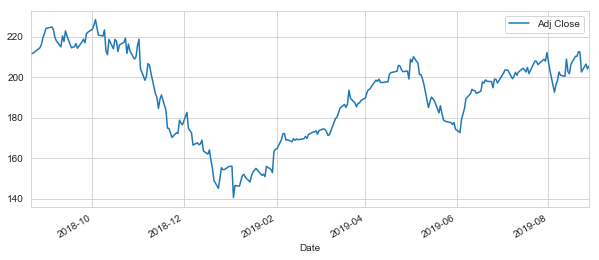

In [124]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

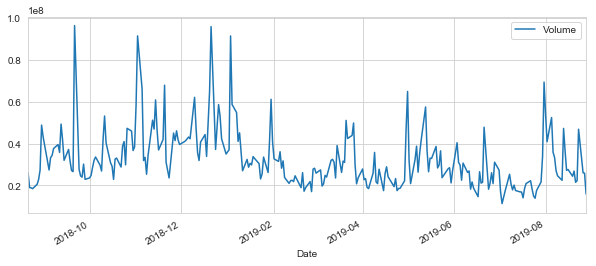

In [125]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [126]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

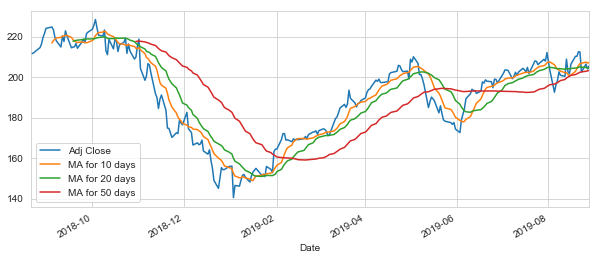

In [127]:
AAPL [['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(10,4))

In [ ]:
# DAILY RETURN ANALYSIS

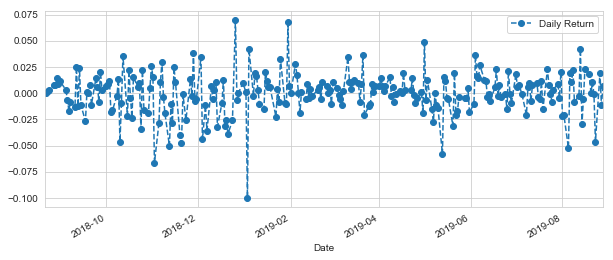

In [128]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

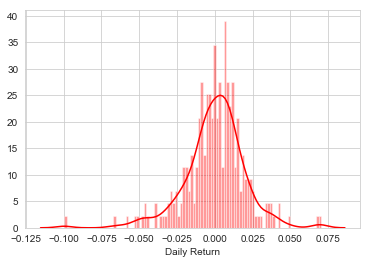

In [129]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'red')

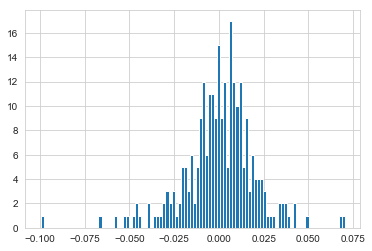

In [130]:
AAPL['Daily Return'].hist(bins=100)

In [139]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock, start, end)['Adj Close']

In [143]:
closing_df = pdr.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'],start,end)['Adj Close']

In [144]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-08-21,211.754028,1883.420044,1201.619995,104.340416
2018-08-22,211.763901,1904.900024,1207.329956,105.403702
2018-08-23,212.197189,1902.900024,1205.380005,105.895966
2018-08-24,212.856949,1905.390015,1220.650024,106.722969
2018-08-27,214.609741,1927.680054,1241.819946,107.904411


In [147]:
tech_rets = closing_df.pct_change()

In [148]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-08-21,NaN,NaN,NaN,NaN
2018-08-22,0.000047,0.011405,0.004752,0.010191
2018-08-23,0.002046,-0.001050,-0.001615,0.004670
2018-08-24,0.003109,0.001309,0.012668,0.007810
2018-08-27,0.008235,0.011698,0.017343,0.011070


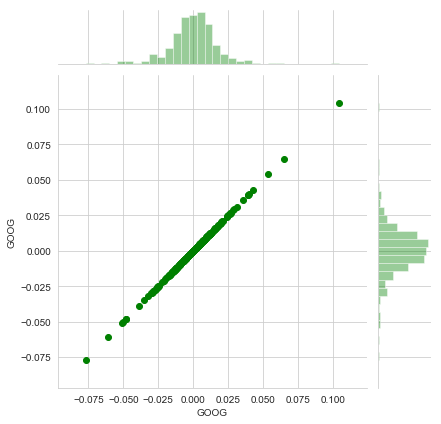

In [150]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter', color = 'green')

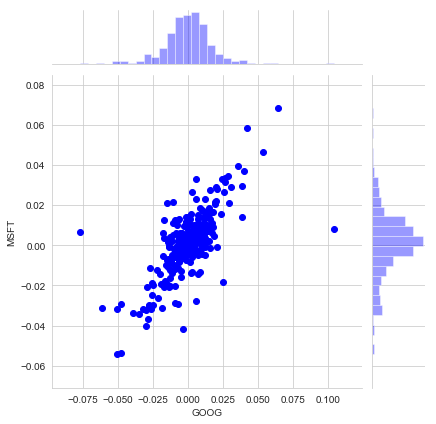

In [151]:
sns.jointplot('GOOG','MSFT',tech_rets,kind = 'scatter', color = 'blue')

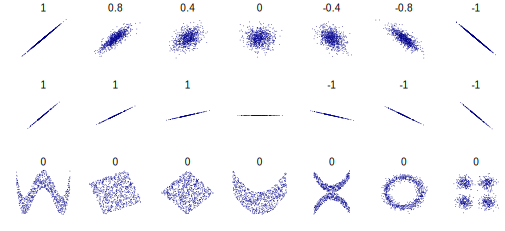

In [152]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [157]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-08-21,NaN,NaN,NaN,NaN
2018-08-22,0.000047,0.011405,0.004752,0.010191
2018-08-23,0.002046,-0.001050,-0.001615,0.004670
2018-08-24,0.003109,0.001309,0.012668,0.007810
2018-08-27,0.008235,0.011698,0.017343,0.011070


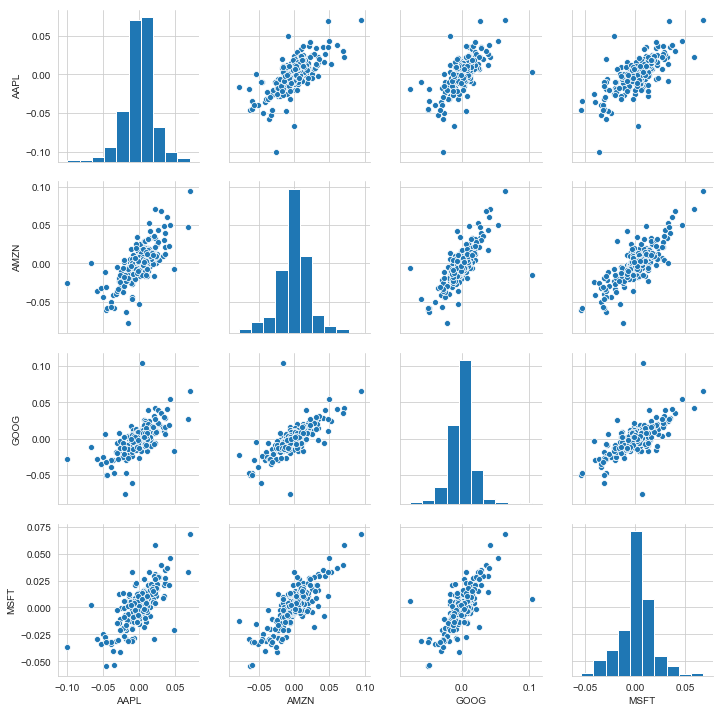

In [153]:
# Histograms of every stock's daily returns
sns.pairplot(tech_rets.dropna())

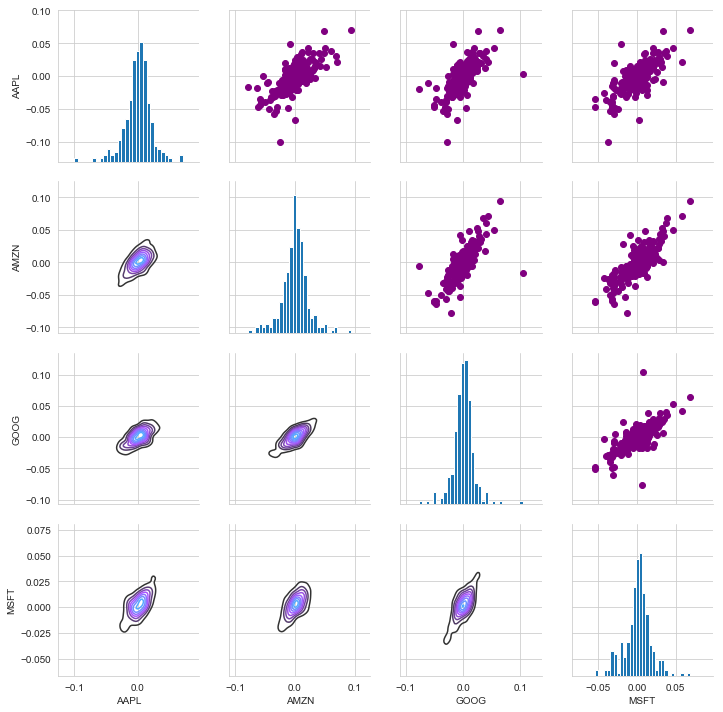

In [156]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

return_fig.map_diag(plt.hist, bins=30)

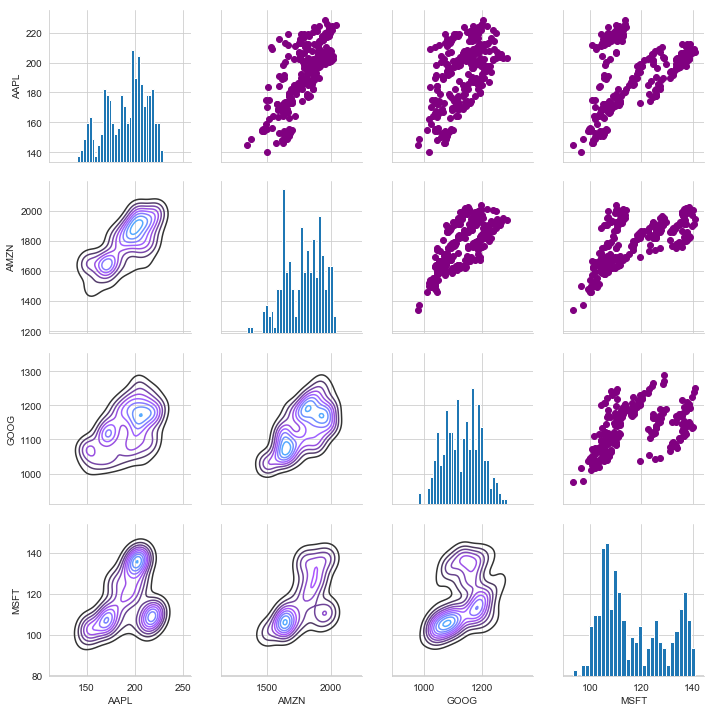

In [158]:
#This one is for closing prices

return_fig = sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

return_fig.map_diag(plt.hist, bins=30)

In [160]:
# CORRELATIONS

AttributeError: 'module' object has no attribute 'corrplot'

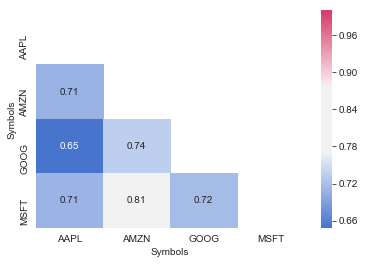

In [163]:
corr = tech_rets.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=sns.diverging_palette(256, 0, sep=80, n=7, as_cmap=True), annot=True, mask=mask)

In [164]:
#RISKS

In [165]:
rets = tech_rets.dropna()


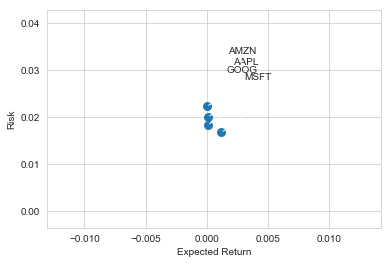

In [167]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
            label,
            xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'))

In [171]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-08-22,0.000047,0.011405,0.004752,0.010191
2018-08-23,0.002046,-0.001050,-0.001615,0.004670
2018-08-24,0.003109,0.001309,0.012668,0.007810
2018-08-27,0.008235,0.011698,0.017343,0.011070
2018-08-28,0.008076,0.002666,-0.008592,0.006022


In [173]:
rets['AAPL'].quantile(0.05)

#Ex.if you have a 1mil investment your 1 day 5% variance at worst will be 32k
# This is your value at risk

-0.03257366501839254